# Spring Indicies Cluster Transitions

## Load the data

In [3]:
from cluster_transition import *

In [4]:
# setting the constants
BASE_DIR = '../data/european_indices'   # folder containing 4 index folders
INDICES = ['Damage_index', 'Last_freeze', 'Leaf', 'Bloom']  # index folder names
START_YEAR = 1960
END_YEAR = 2019
BAND = 4  # I found out that for some indices there are more bands if spmething then band 1
CHUNKS = {"x": 256, "y": 256}  # I use chunks for memory efficient loading

In [5]:
ds = load_dataset(BASE_DIR, INDICES, START_YEAR, END_YEAR, BAND, CHUNKS)

In [6]:
ds

<xarray.Dataset> Size: 41GB
Dimensions:       (x: 6647, y: 4232, time: 60)
Coordinates:
  * x             (x) float64 53kB -10.58 -10.57 -10.56 ... 44.79 44.8 44.8
  * y             (y) float64 34kB 71.25 71.25 71.24 71.23 ... 36.01 36.0 36.0
    spatial_ref   int64 8B 0
  * time          (time) int64 480B 1960 1961 1962 1963 ... 2016 2017 2018 2019
Data variables:
    Damage_index  (time, y, x) float64 14GB dask.array<chunksize=(1, 256, 256), meta=np.ndarray>
    Last_freeze   (time, y, x) float64 14GB dask.array<chunksize=(1, 256, 256), meta=np.ndarray>
    Leaf          (time, y, x) float32 7GB dask.array<chunksize=(1, 256, 256), meta=np.ndarray>
    Bloom         (time, y, x) float32 7GB dask.array<chunksize=(1, 256, 256), meta=np.ndarray>

In [7]:
ds1 = ds[INDICES].sel(time=slice(1960, 1989)).mean(dim="time")
ds2 = ds[INDICES].sel(time=slice(1990, 2019)).mean(dim="time")

## Cluster transition

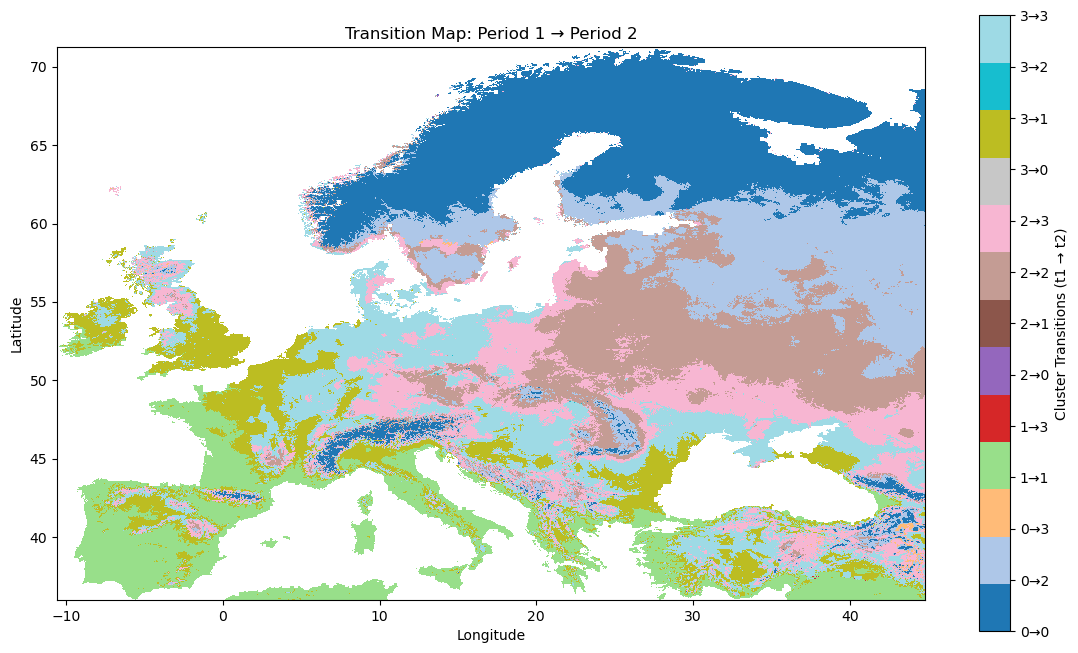

In [8]:
labels_list, transition_matrices, transition_maps = cluster_transition_analysis(
    [ds1, ds2], variables=INDICES, n_clusters=4, scale_together=True
)

## Cluster description

In [9]:
cluster_summary_ds1 = describe_clusters(ds1, labels_list[0], INDICES)
cluster_summary_ds2 = describe_clusters(ds2, labels_list[1], INDICES)

In [10]:
cluster_summary_ds1

,cluster,variable,mean,median,std
0,0,Damage_index,-144.937389,-147.400000,13.173669
1,0,Last_freeze,277.940486,283.466667,18.503152
2,0,Leaf,133.003098,131.433334,13.275015
3,0,Bloom,161.682975,159.466660,16.348273
4,1,Damage_index,6.192819,6.033333,14.976860
5,1,Last_freeze,37.906915,40.700000,22.775018
6,1,Leaf,44.093198,44.766666,10.639805
7,1,Bloom,84.234588,86.566666,15.451181
8,2,Damage_index,-90.843201,-88.900000,29.278814
9,2,Last_freeze,197.396424,194.466667,31.800663


In [11]:
cluster_summary_ds2

,cluster,variable,mean,median,std
0,0,Damage_index,-148.834349,-152.266667,15.397830
1,0,Last_freeze,285.892705,291.400000,15.116965
2,0,Leaf,137.058356,135.733337,10.113584
3,0,Bloom,168.244689,165.566666,13.076275
4,1,Damage_index,2.939197,3.000000,19.081828
5,1,Last_freeze,50.334014,53.750000,27.557608
6,1,Leaf,53.288081,54.233334,14.825991
7,1,Bloom,91.997097,95.733330,17.196839
8,2,Damage_index,-129.088885,-131.300000,20.991306
9,2,Last_freeze,239.071853,241.166667,25.203560


In [12]:
desc =  describe_cluster_transitions(ds1, ds2, labels_list[0], labels_list[1],
   INDICES, transition_matrices[0])

In [13]:
desc

,cluster,variable,mean_t1,median_t1,std_t1,mean_t2,median_t2,std_t2,area_t1,area_t2,area_change,pct_change,retention_rate,inflow,outflow,inflow_ratio,outflow_ratio,mean_change,median_change
0,0,Bloom,161.682975,159.466660,16.348273,168.244689,165.566666,13.076275,6167736,3654030,-2513706,-40.755733,0.592230,1313,2515019,0.000359,0.407770,6.561713,6.100006
1,0,Damage_index,-144.937389,-147.400000,13.173669,-148.834349,-152.266667,15.397830,6167736,3654030,-2513706,-40.755733,0.592230,1313,2515019,0.000359,0.407770,-3.896960,-4.866667
2,0,Last_freeze,277.940486,283.466667,18.503152,285.892705,291.400000,15.116965,6167736,3654030,-2513706,-40.755733,0.592230,1313,2515019,0.000359,0.407770,7.952218,7.933333
3,0,Leaf,133.003098,131.433334,13.275015,137.058356,135.733337,10.113584,6167736,3654030,-2513706,-40.755733,0.592230,1313,2515019,0.000359,0.407770,4.055258,4.300003
4,1,Bloom,84.234588,86.566666,15.451181,91.997097,95.733330,17.196839,1910489,3594514,1684025,88.146281,0.999857,1684299,274,0.468575,0.000143,7.762508,9.166664
5,1,Damage_index,6.192819,6.033333,14.976860,2.939197,3.000000,19.081828,1910489,3594514,1684025,88.146281,0.999857,1684299,274,0.468575,0.000143,-3.253622,-3.033333
6,1,Last_freeze,37.906915,40.700000,22.775018,50.334014,53.750000,27.557608,1910489,3594514,1684025,88.146281,0.999857,1684299,274,0.468575,0.000143,12.427099,13.050000
7,1,Leaf,44.093198,44.766666,10.639805,53.288081,54.233334,14.825991,1910489,3594514,1684025,88.146281,0.999857,1684299,274,0.468575,0.000143,9.194883,9.466667
8,2,Bloom,135.231484,133.899994,8.831556,137.126708,136.633331,8.790126,4603049,5010465,407416,8.851003,0.549084,2483003,2075587,0.495563,0.450916,1.895224,2.733337
9,2,Damage_index,-90.843201,-88.900000,29.278814,-129.088885,-131.300000,20.991306,4603049,5010465,407416,8.851003,0.549084,2483003,2075587,0.495563,0.450916,-38.245684,-42.400000


In [14]:
desc.to_csv('../outputs/cluster_descriptions.csv')

## Visualize changes

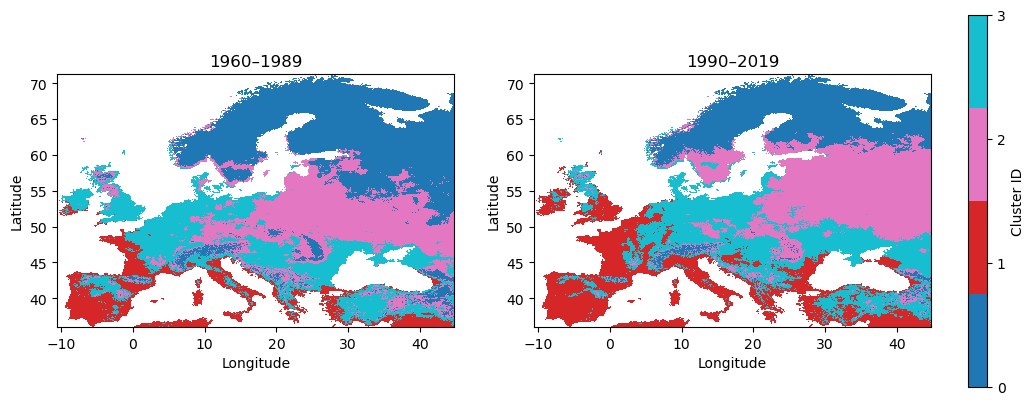

In [15]:
visualize_cluster_maps(labels_list, n_clusters=4, titles=["1960–1989", "1990–2019"], ds_ref=ds1)

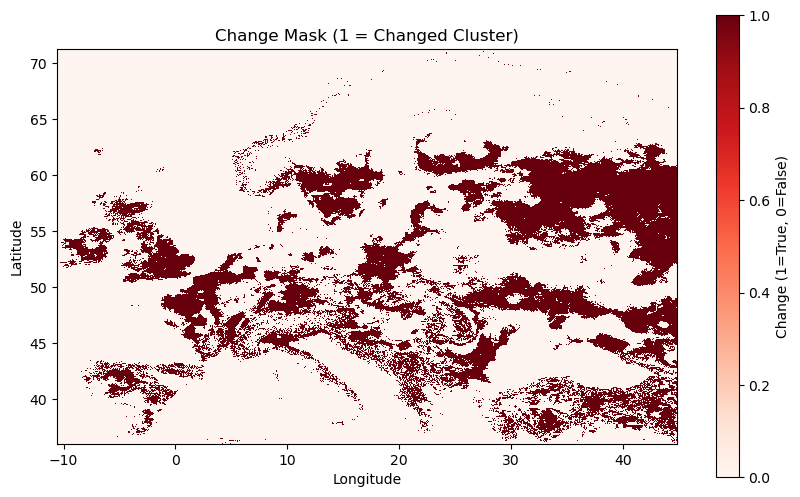

In [16]:
visualize_change_mask(labels_list[0], labels_list[1], ds_ref=ds1)

## Saving the results for later work

In [ ]:
import joblib

# Save
joblib.dump(
    {
        "labels_list": labels_list,
        "transition_matrices": transition_matrices,
        "transition_maps": transition_maps
    },
    "../outputs/cluster_transition_results.joblib"
)